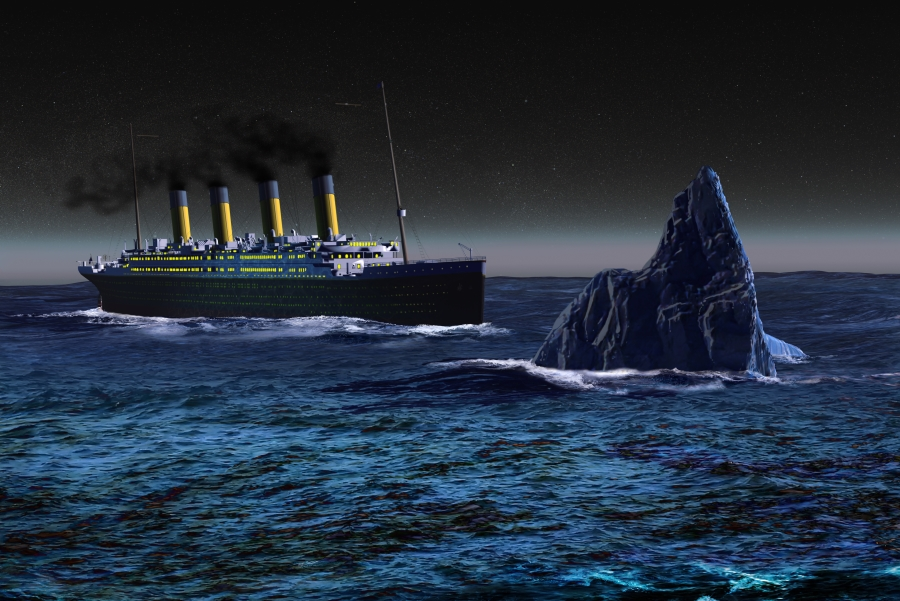

In [31]:
Image('...Path/', width=912)

In [32]:
def models(X_Train, Y_Train):
    

    #Logistic-Regrassion
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_Train, Y_Train)
    print('Logistic-Regression Train Accuracy: ', log.score(X_Train, Y_Train))
# ------------------------------------------------------------------------------------------
    #Decision-Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_Train, Y_Train)
    print('Decision-Tree Train Accuracy: ', tree.score(X_Train, Y_Train))
#-------------------------------------------------------------------------------------------

    #Random-Forest_Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=20,
                                    criterion='entropy',
                                    min_samples_split=7,
                                    random_state=5,
                                    bootstrap=True)
    forest.fit(X_Train, Y_Train)
    print('Random-Forest_Classifier Train Accuracy: ', forest.score(X_Train, Y_Train))
    #'n_estimators': The number of trees in the forest.
    
#--------------------------------------------------------------------------------------------    

    return log, tree, forest

In [33]:
Model = models(X_Train, Y_Train)

Logistic-Regression Train Accuracy:  0.8019662921348315
Decision-Tree Train Accuracy:  0.8497191011235955
Random-Forest_Classifier Train Accuracy:  0.8469101123595506


In [34]:
from sklearn.metrics import confusion_matrix

for i in range(len(Model)):
    Acc_ts_Model = confusion_matrix(Y_Test, Model[i].predict(X_Test))
    
    TN, FP, FN, TP = confusion_matrix(Y_Test, Model[i].predict(X_Test)).ravel()
    
    Test_Score = (TP + TN) / (TP + TN + FN + FP)
    
    print(Acc_ts_Model)
    print('Model [{}] Testing Accuracy = "{}" '.format(i, Test_Score))
    print('---------------------------------------------------------')

[[94 16]
 [20 49]]
Model [0] Testing Accuracy = "0.7988826815642458" 
---------------------------------------------------------
[[99 11]
 [17 52]]
Model [1] Testing Accuracy = "0.8435754189944135" 
---------------------------------------------------------
[[99 11]
 [18 51]]
Model [2] Testing Accuracy = "0.8379888268156425" 
---------------------------------------------------------


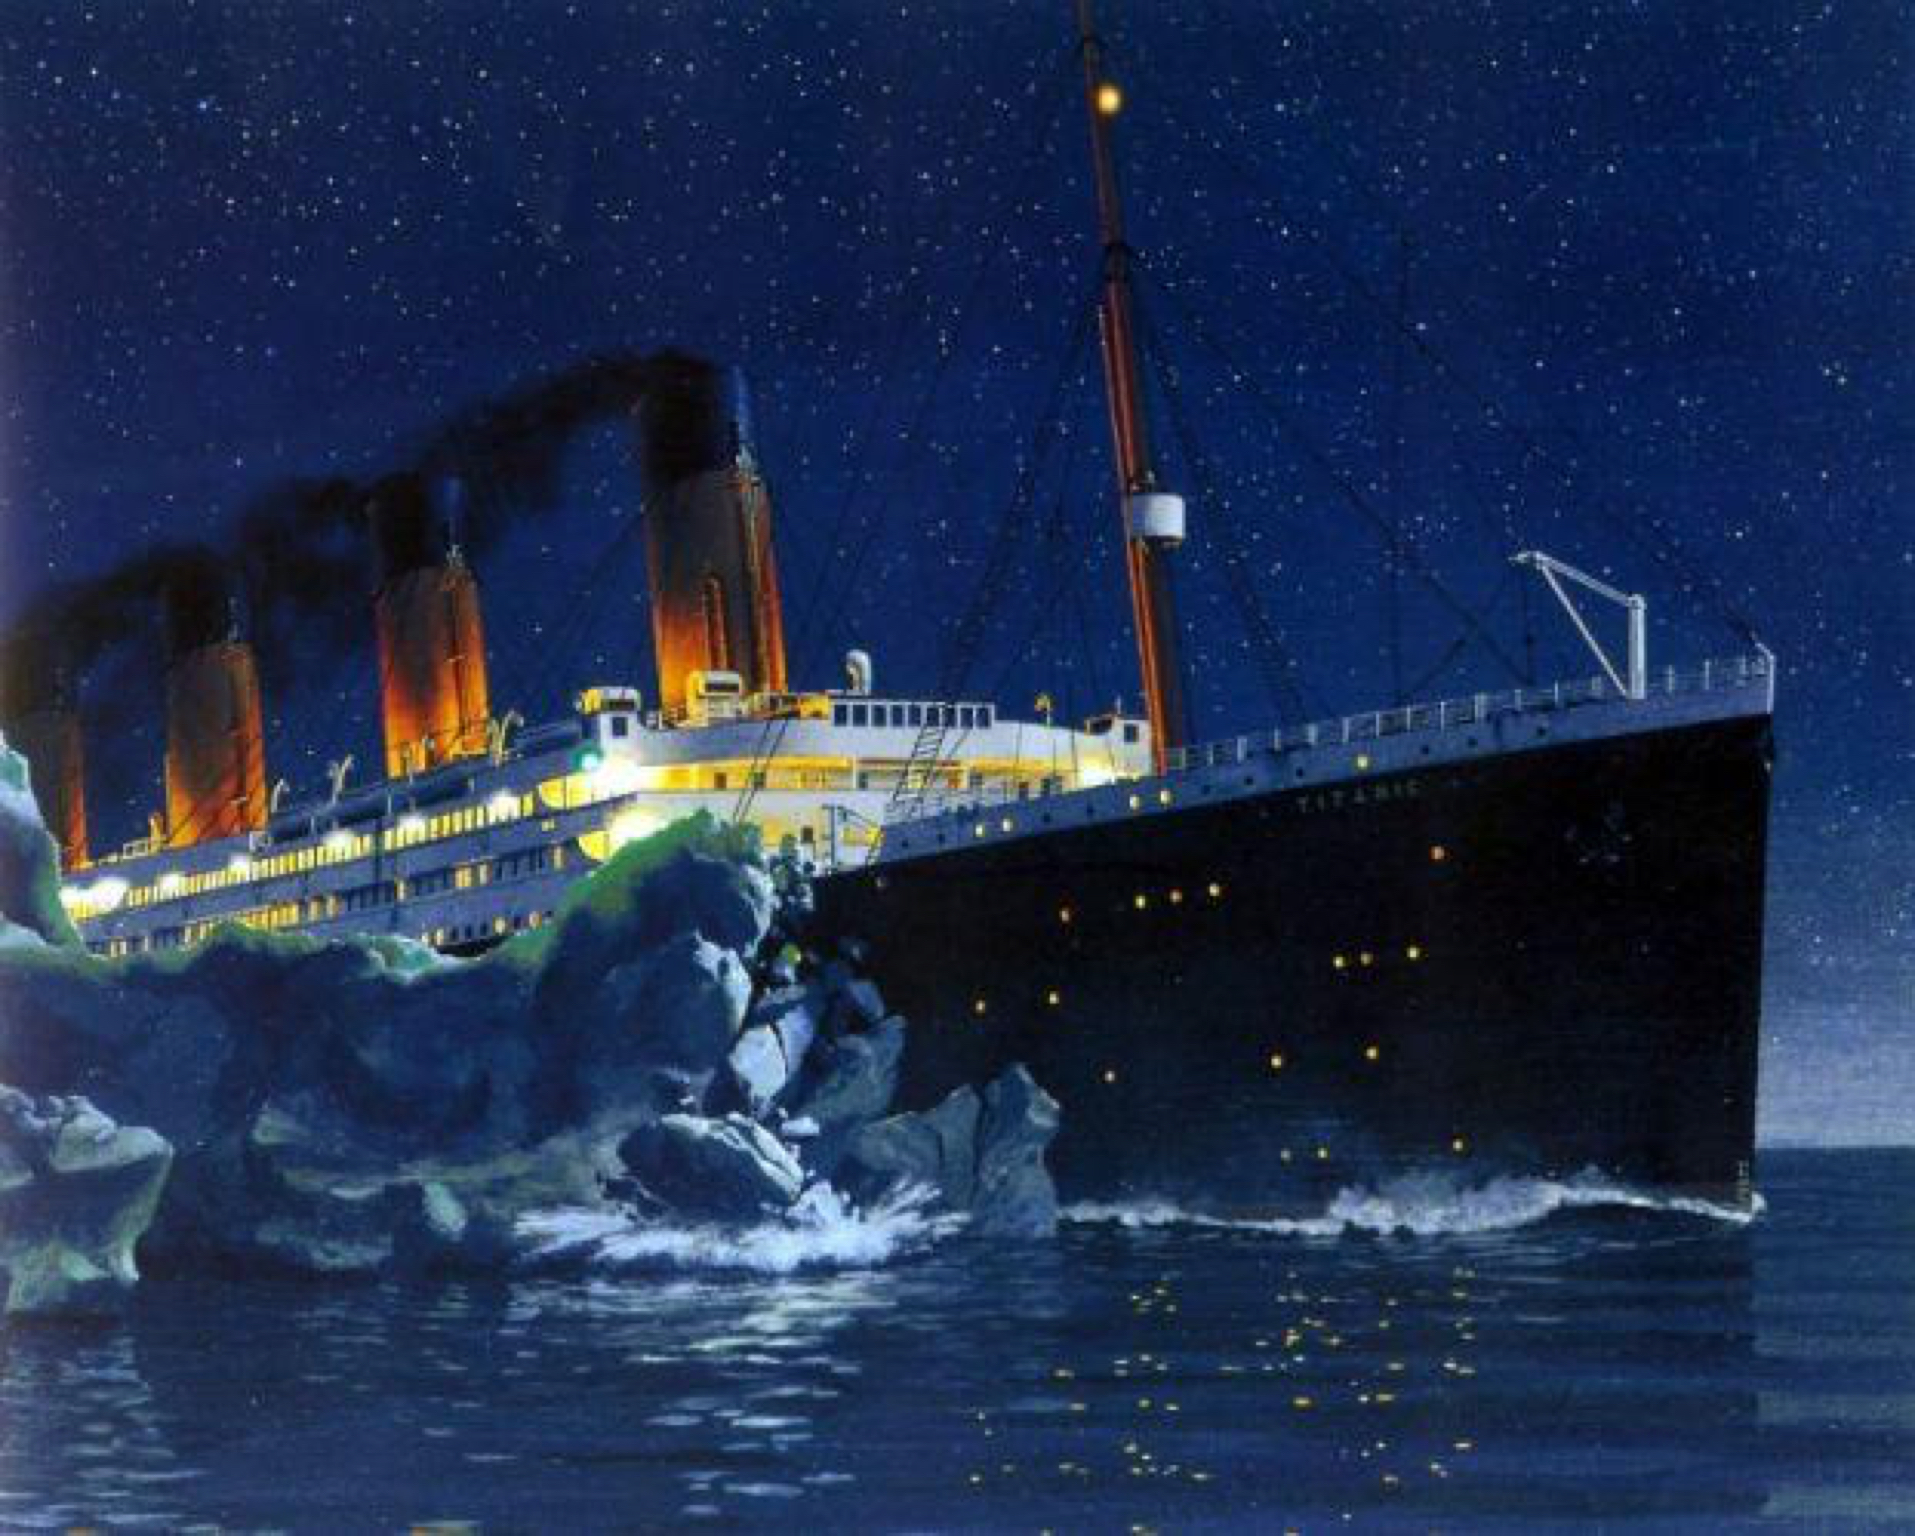

In [36]:
Image('...Path/', width=912)

In [37]:
#Print the prediction of the Logistic-Regression
Pred_Lr = Model[0].predict(X_Test)
print('Logistic-Regression Model:')
print(Pred_Lr)

print()
print('------------------------------------------------------------------')
print()

#Print the prediction of the Decision-Tree
Pred_Tree = Model[1].predict(X_Test)
print('Decision-Tree Model:')
print(Pred_Tree)

print()
print('------------------------------------------------------------------')
print()

#Print the prediction of the Random-Forest-Classifier
Pred_Rf = Model[2].predict(X_Test)
print('Random-Forest Model:')
print(Pred_Rf)


print()
print('------------------------------------------------------------------')
print()

#Print the actual values 
print('Real-Data')
print(Y_Test)

Logistic-Regression Model:
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]

------------------------------------------------------------------

Decision-Tree Model:
[0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]

------------------------------------------------------------------

Random-Forest Model:
[0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 

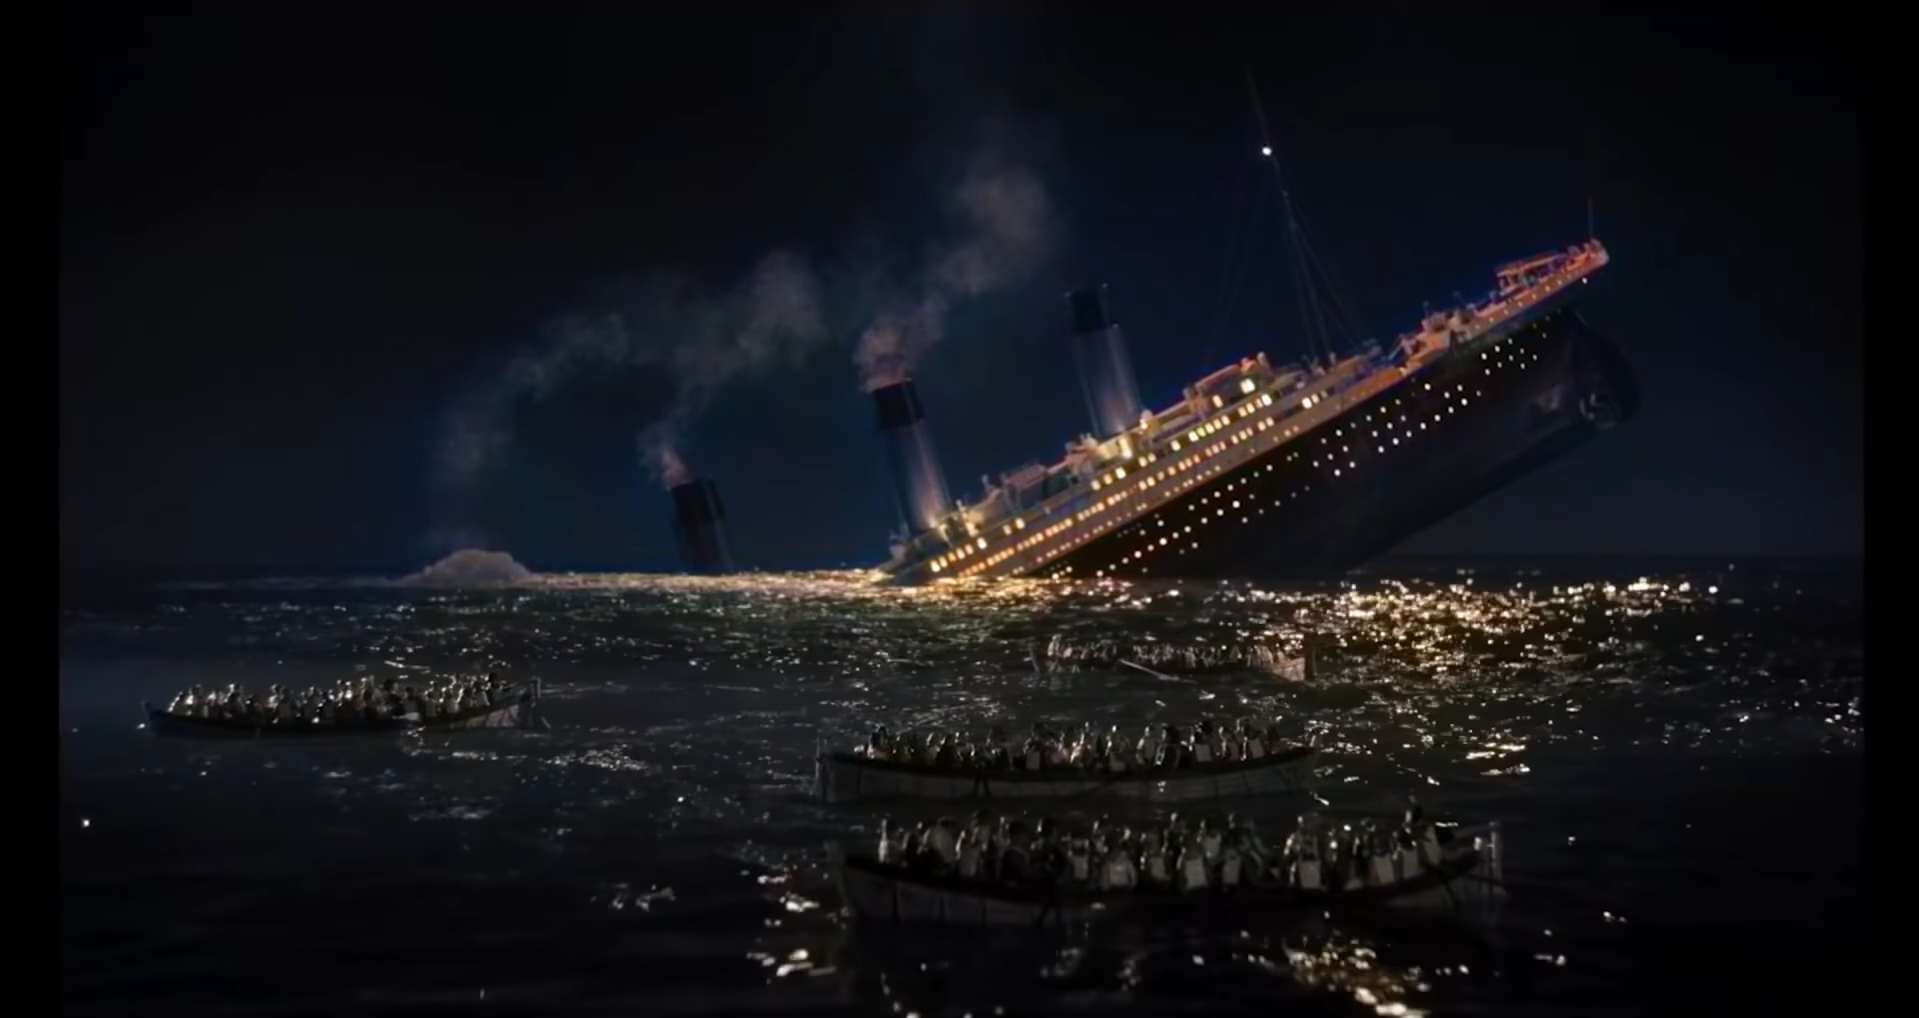

In [38]:
Image('...Path/', width=912)

In [39]:
Titan_Tt.head(6)

Pclass  Sex  Age  Fare  Cabins  Total Family
0       3    1  2.0   0.0       3             0
1       3    2  2.0   0.0       1             1
2       2    1  3.0   0.0       3             0
3       3    1  1.0   0.0       1             0
4       3    2  1.0   0.0       3             2
5       3    1  0.0   0.0       3             0

In [40]:
Rf_PredT = Model[2].predict(Titan_Tt)
Titan_Tt['My_Pred_Rf'] = Rf_PredT
Titan_Tt['Real_Data_Surv'] = pd.DataFrame(Features_Data['Survived'])
Titan_Tt.iloc[:16 , :]

Pclass  Sex  Age  Fare  Cabins  Total Family  My_Pred_Rf  Real_Data_Surv
0        3    1  2.0   0.0       3             0           0               0
1        3    2  2.0   0.0       1             1           1               1
2        2    1  3.0   0.0       3             0           0               0
3        3    1  1.0   0.0       1             0           0               0
4        3    2  1.0   0.0       3             2           0               1
5        3    1  0.0   0.0       3             0           0               0
6        3    2  1.0   0.0       1             0           1               1
7        2    1  1.0   1.0       3             2           0               0
8        3    2  0.0   0.0       3             0           1               1
9        3    1  1.0   1.0       2             2           0               0
10       3    1  1.0   0.0       3             0           0               0
11       1    1  2.0   1.0       1             0           1               0
12       1    2  1.0   2.0       3             1           1               1
13       2    1  3.0   1.0       3             1           0               0
14       1    2  2.0   2.0       3             1           1               1
15       2    2  1.0   1.0       2             1           1               1

In [41]:
#How much percent corect is my model

Count0 = 0
Count1 = 1
Count2 = 0

for i in range(len(Titan_Tt)):
    Num_Rand_F = Titan_Tt.iloc[i,6]
    Num_R_D = Titan_Tt.iloc[i,7]
    if Num_Rand_F == 0 and Num_R_D == 0:
        Count0 += 1
    elif Num_Rand_F == 1 and Num_R_D == 1:
        Count1 += 1
    else:
        Count2 += 1
        
print('The rate of passengers that did not survive : ',Count0)
print('The rate of passengers that did survive : ',Count1)
print()
print('The Random-Forest-Model from {} rows, was wrong {} rows'.format(len(Titan_Tt),Count2-1))
print('Random-Forest-Model is {:.2f}% right'.format((( Count0 + Count1 )/ len(Titan_Tt)) *100))

The rate of passengers that did not survive :  251
The rate of passengers that did survive :  110

The Random-Forest-Model from 417 rows, was wrong 56 rows
Random-Forest-Model is 86.57% right


<ipython-input-42-3876db224ba1>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


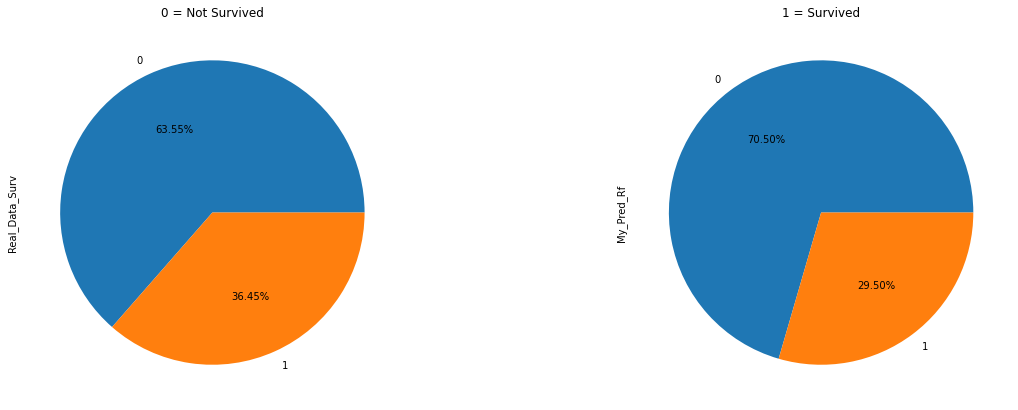

In [42]:
fig, (x1, x2) = plt.subplots(1,2, figsize=(20,7))

#Prediction in Real-Data who survived
Titan_Tt['Real_Data_Surv'].value_counts().plot.pie(autopct='%1.2f%%', ax=x1)
x1.set_title('0 = Not Survived')

#Prediction My-Model-Data who survived
Titan_Tt['My_Pred_Rf'].value_counts().plot.pie(autopct='%1.2f%%', ax=x2)
x2.set_title('1 = Survived')

fig.show()

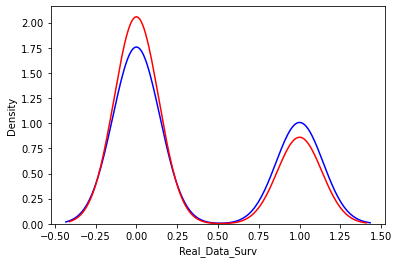

In [43]:
#How right it is My_Prediction-Model-Data in Real-Data Survived
fig = sns.kdeplot(Titan_Tt['Real_Data_Surv'], shade=False, color="b")
fig = sns.kdeplot(Titan_Tt['My_Pred_Rf'], shade=False, color="r")
plt.show()

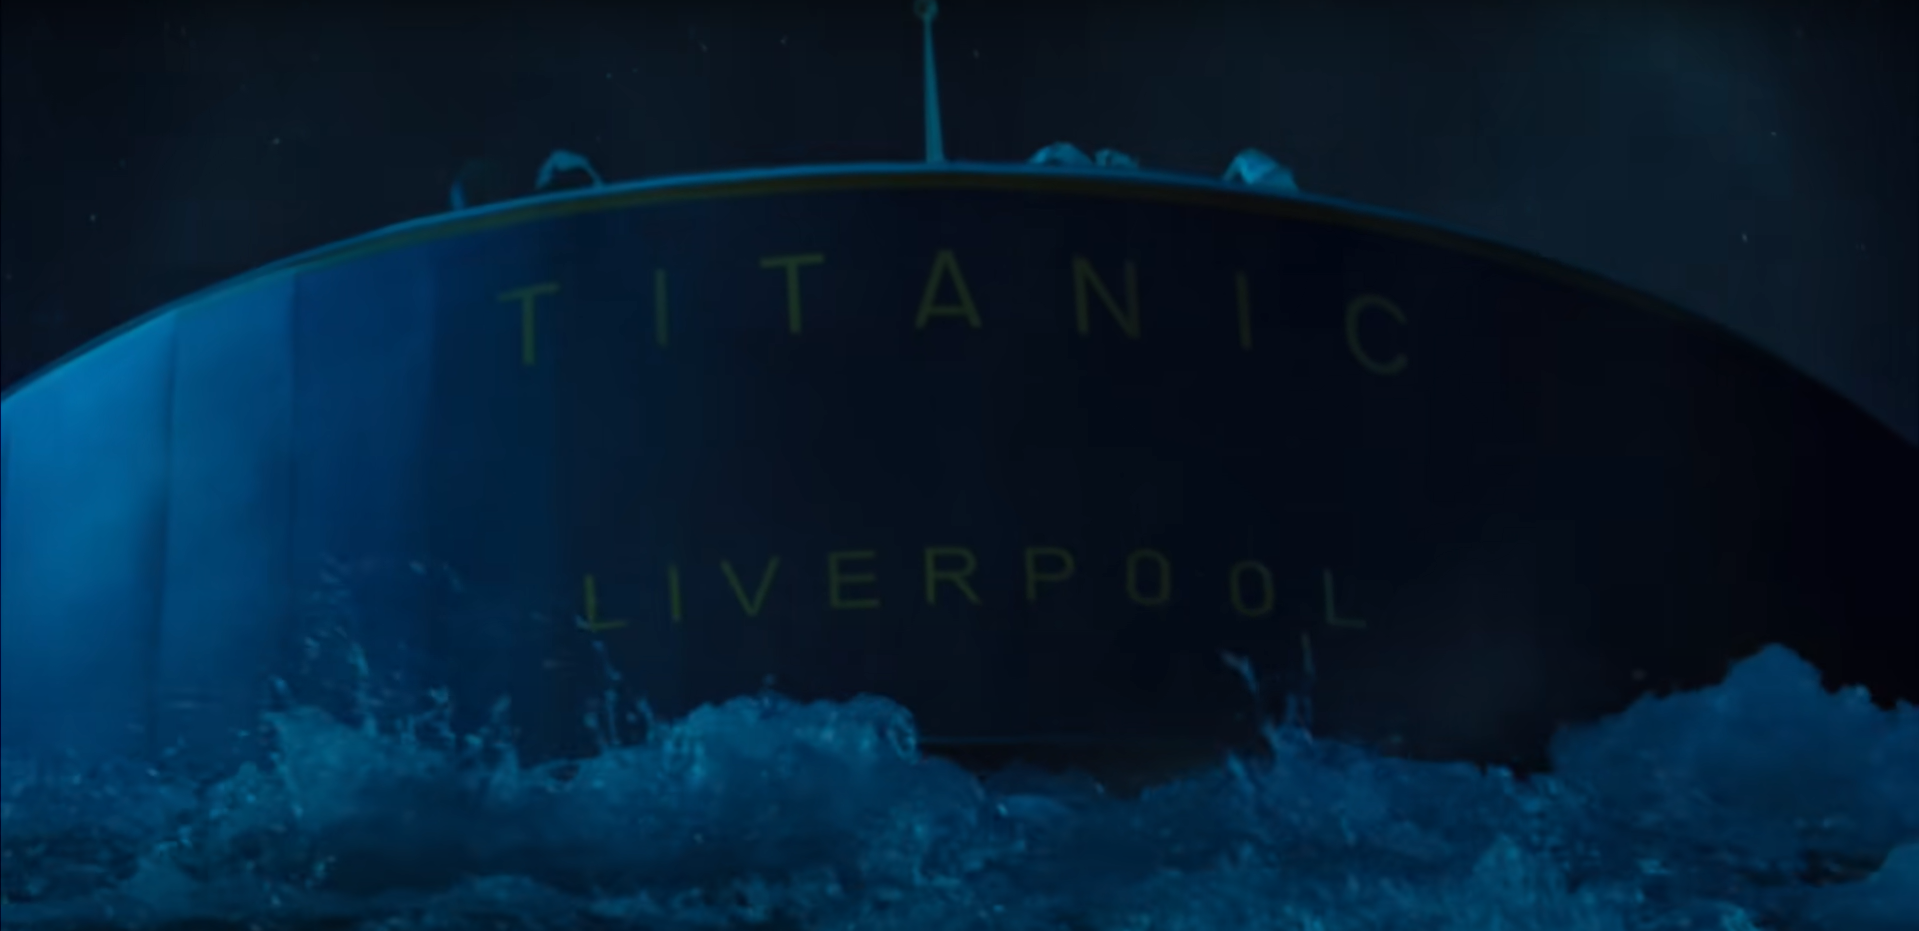

In [44]:
Image('...Path/', width=912)